In [18]:
import optuna
import matplotlib.pyplot as plt
import numpy as np

study_name = "mpc_study_test" 
storage_url = "sqlite:///./study_traj_11.db"

study = optuna.load_study(study_name=study_name, storage=storage_url)

points = []
for trial in study.trials:
    if trial.values is not None and len(trial.values) >= 2:
        success_rate = trial.values[0] 
        avg_time = trial.values[1]
        points.append((success_rate, avg_time))

points = np.array(points)

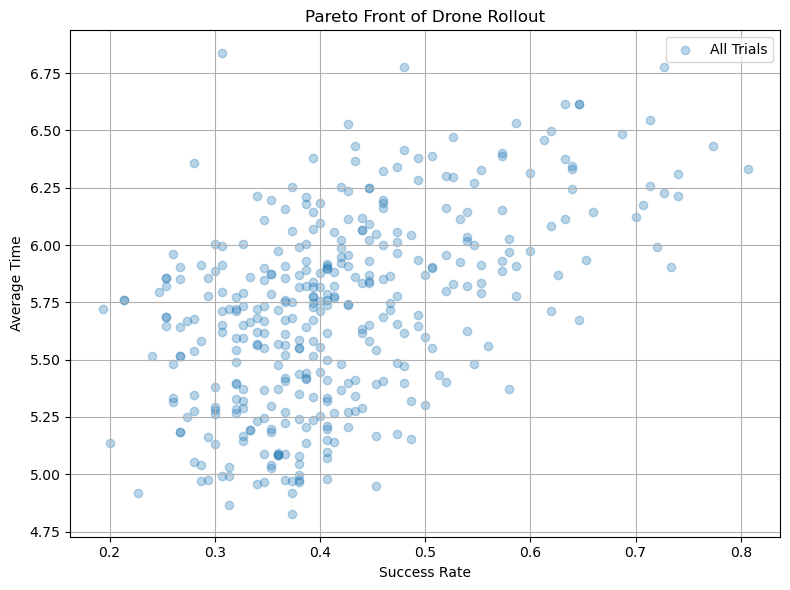

In [19]:
def is_dominated(p1, others):
    return np.any(np.all(others <= p1, axis=1) & np.any(others < p1, axis=1))

pareto_points = np.array([p for p in points if not is_dominated(p, points)])

plt.figure(figsize=(8, 6))
plt.scatter(points[:, 0], points[:, 1], alpha=0.3, label="All Trials")

plt.xlabel("Success Rate")
plt.ylabel("Average Time")
plt.title("Pareto Front of Drone Rollout")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()